# Rutik Kothwala
## Introduction to Data Science - Project 3 (Timeseries Forecasting)

In [1]:
#Importing required Libraries 

In [2]:
import pandas as pd
from prophet import Prophet
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import sklearn.metrics as metrics
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from prophet.diagnostics import performance_metrics
from prophet.plot import plot_cross_validation_metric
from prophet.diagnostics import cross_validation

In [3]:
df = pd.read_csv('dataset-3.csv', low_memory = False)

In [4]:
#Converting the data into ds and y for FB prophet model

In [5]:
df.columns = ['ds' , 'y']

In [6]:
df

,ds,y
0,2010-01-01,128800.0
1,2010-02-01,115200.0
2,2010-03-01,103200.0
3,2010-04-01,105600.0
4,2010-05-01,97600.0
...,...,...
407026,2022-01-01,0.0
407027,2022-01-01,0.0
407028,2022-01-01,59600.0
407029,2022-01-01,84000.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407031 entries, 0 to 407030
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ds      407031 non-null  object 
 1   y       407031 non-null  float64
dtypes: float64(1), object(1)
memory usage: 6.2+ MB


In [8]:
df.shape

(407031, 2)

In [9]:
df.isnull().sum()

ds    0
y     0
dtype: int64

In [10]:
display(df)

,ds,y
0,2010-01-01,128800.0
1,2010-02-01,115200.0
2,2010-03-01,103200.0
3,2010-04-01,105600.0
4,2010-05-01,97600.0
...,...,...
407026,2022-01-01,0.0
407027,2022-01-01,0.0
407028,2022-01-01,59600.0
407029,2022-01-01,84000.0


In [11]:
#Converting the time data into datetime64 data type using pandas

In [12]:
df['ds']= pd.to_datetime(df["ds"])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407031 entries, 0 to 407030
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   ds      407031 non-null  datetime64[ns]
 1   y       407031 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 6.2 MB


In [14]:
df

,ds,y
0,2010-01-01,128800.0
1,2010-02-01,115200.0
2,2010-03-01,103200.0
3,2010-04-01,105600.0
4,2010-05-01,97600.0
...,...,...
407026,2022-01-01,0.0
407027,2022-01-01,0.0
407028,2022-01-01,59600.0
407029,2022-01-01,84000.0


In [15]:
df_1 = df.set_index('ds')

In [16]:
df_1

,y
ds,
2010-01-01,128800.0
2010-02-01,115200.0
2010-03-01,103200.0
2010-04-01,105600.0
2010-05-01,97600.0
...,...
2022-01-01,0.0
2022-01-01,0.0
2022-01-01,59600.0


In [17]:
#Grouping all the data combined in Monthly set

In [18]:
df_m =df_1.groupby(pd.Grouper(freq='M')).mean()

In [19]:
df_m

,y
ds,
2010-01-31,45446.030782
2010-02-28,38808.144583
2010-03-31,36667.210941
2010-04-30,36808.514463
2010-05-31,36933.632880
...,...
2021-09-30,33186.180491
2021-10-31,25960.355783
2021-11-30,25986.352243


In [20]:
#Training the Prophet monthly model setting period of 9

In [21]:
model_m = Prophet()
model_m.fit(df_m.reset_index() \
              .rename(columns={'Revenue Month':'ds',
                               'Consumption (KWH)':'y'}))
future = model_m.make_future_dataframe(periods = 9 , freq = 'M')
forecast_m = model_m.predict(future)

05:31:22 - cmdstanpy - INFO - Chain [1] start processing
05:31:22 - cmdstanpy - INFO - Chain [1] done processing


In [22]:
forecast_m.tail(12)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
142,2021-11-30,28093.968851,21695.384482,26492.918208,28093.968851,28093.968851,-3812.584048,-3812.584048,-3812.584048,-3812.584048,-3812.584048,-3812.584048,0.0,0.0,0.0,24281.384802
143,2021-12-31,28062.605298,24288.656574,29362.854691,28062.605298,28062.605298,-1300.710142,-1300.710142,-1300.710142,-1300.710142,-1300.710142,-1300.710142,0.0,0.0,0.0,26761.895156
144,2022-01-31,28031.241746,24826.344147,29647.598449,28031.241746,28031.241746,-870.372509,-870.372509,-870.372509,-870.372509,-870.372509,-870.372509,0.0,0.0,0.0,27160.869237
145,2022-02-28,28002.913376,22165.370715,27133.875238,28002.913376,28002.913376,-3411.274242,-3411.274242,-3411.274242,-3411.274242,-3411.274242,-3411.274242,0.0,0.0,0.0,24591.639135
146,2022-03-31,27971.549824,19922.101563,25040.585121,27967.397861,27974.839865,-5427.862451,-5427.862451,-5427.862451,-5427.862451,-5427.862451,-5427.862451,0.0,0.0,0.0,22543.687373
147,2022-04-30,27941.197999,19485.167781,24423.908456,27929.025545,27952.207490,-5872.861459,-5872.861459,-5872.861459,-5872.861459,-5872.861459,-5872.861459,0.0,0.0,0.0,22068.336540
148,2022-05-31,27909.834447,20116.373744,25292.942423,27886.584054,27930.468241,-5294.560570,-5294.560570,-5294.560570,-5294.560570,-5294.560570,-5294.560570,0.0,0.0,0.0,22615.273877
149,2022-06-30,27879.482622,26708.898909,31866.917054,27843.488900,27913.606733,1424.214199,1424.214199,1424.214199,1424.214199,1424.214199,1424.214199,0.0,0.0,0.0,29303.696821
150,2022-07-31,27848.119070,37078.656141,42003.615676,27796.862343,27896.955380,11852.233239,11852.233239,11852.233239,11852.233239,11852.233239,11852.233239,0.0,0.0,0.0,39700.352309
151,2022-08-31,27816.755518,35768.009376,40796.007256,27749.437167,27881.448695,10252.172475,10252.172475,10252.172475,10252.172475,10252.172475,10252.172475,0.0,0.0,0.0,38068.927992


In [23]:
#Monthly forcasted graph plot

<AxesSubplot:xlabel='ds'>

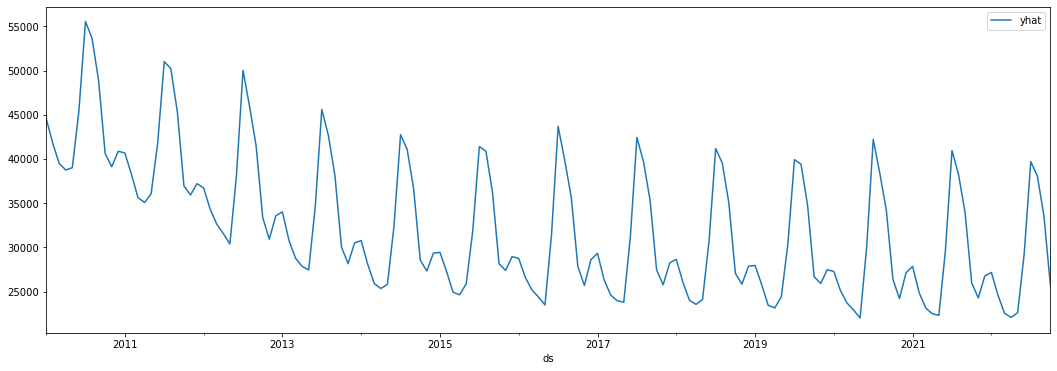

In [76]:
forecast_m.plot(x='ds',y='yhat',figsize=(18,6))


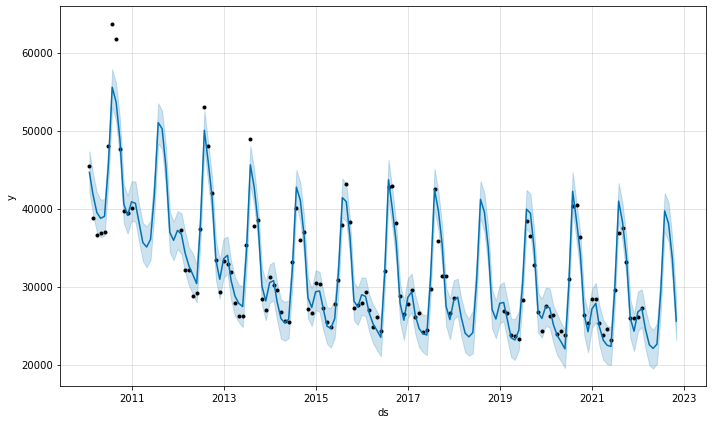

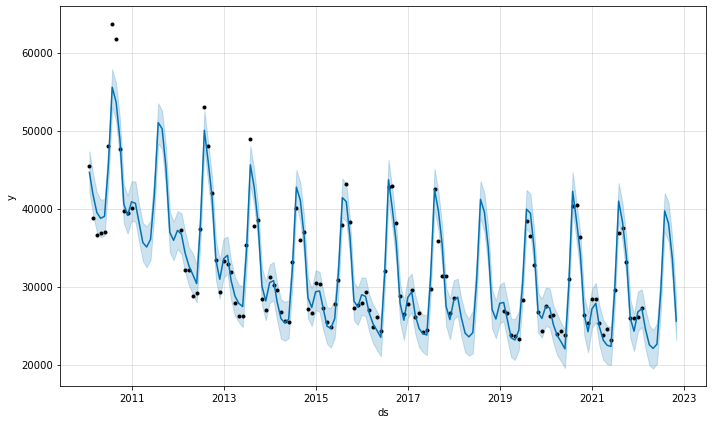

In [25]:
model_m.plot(forecast_m, uncertainty=True)

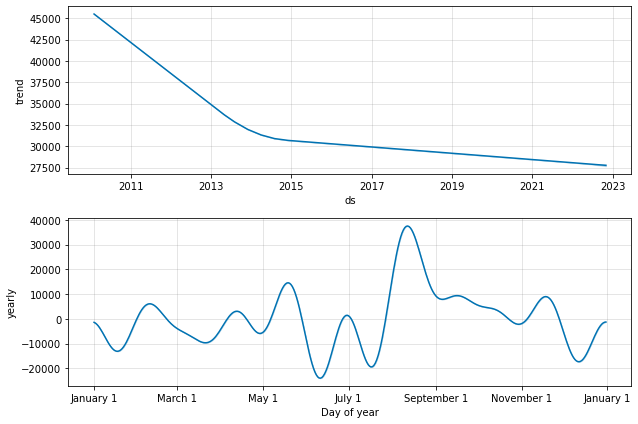

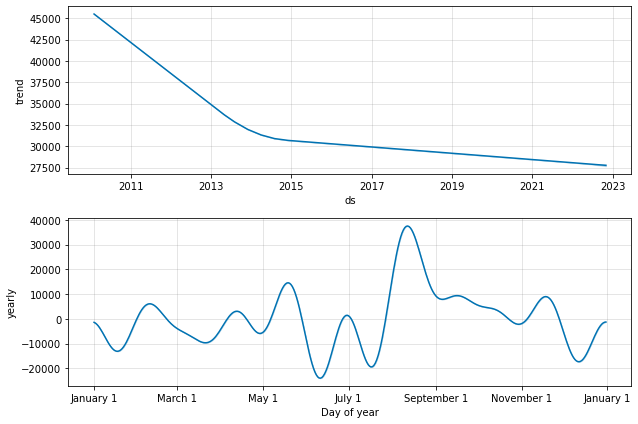

In [26]:
model_m.plot_components(forecast_m)

In [27]:
#Changepoints of the model

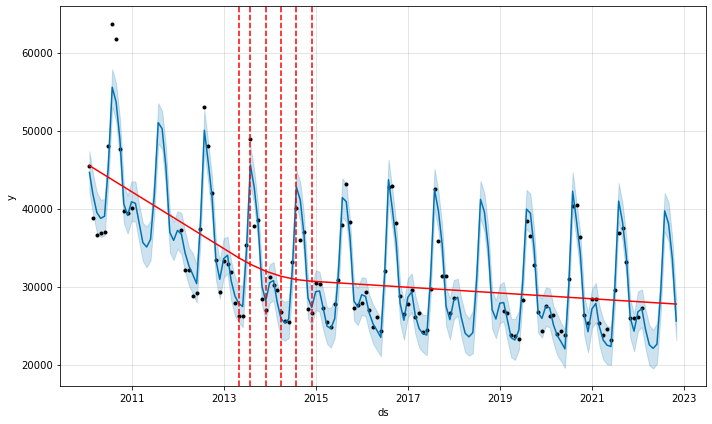

In [28]:
from prophet.plot import add_changepoints_to_plot
fig = model_m.plot(forecast_m)
a = add_changepoints_to_plot(fig.gca(), model_m, forecast_m)

In [29]:
model_m.changepoints

4    2010-05-31
8    2010-09-30
11   2010-12-31
15   2012-04-30
19   2012-08-31
23   2012-12-31
27   2013-04-30
30   2013-07-31
34   2013-11-30
38   2014-03-31
42   2014-07-31
46   2014-11-30
49   2015-02-28
53   2015-06-30
57   2015-10-31
61   2016-02-29
65   2016-06-30
68   2016-09-30
72   2017-01-31
76   2017-05-31
80   2017-09-30
84   2019-01-31
87   2019-04-30
91   2019-08-31
95   2019-12-31
Name: ds, dtype: datetime64[ns]

In [30]:
#Cross validaiton and Performance Rating

  0%|          | 0/1 [00:00<?, ?it/s]

05:31:23 - cmdstanpy - INFO - Chain [1] start processing
05:31:23 - cmdstanpy - INFO - Chain [1] done processing


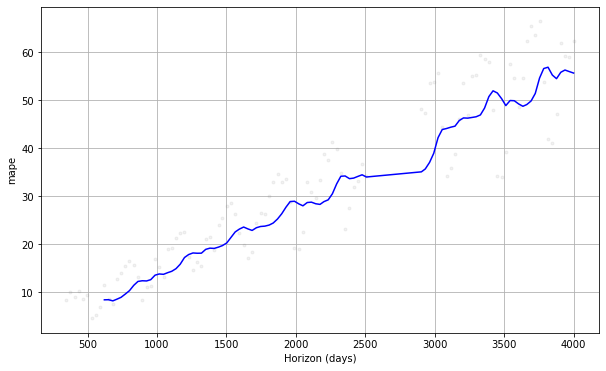

In [31]:
df_cv = cross_validation(model_m, initial='370 days', period='50 days', horizon = '4000 days')
df_p = performance_metrics(df_cv)
df_p

fig = plot_cross_validation_metric(df_cv, metric='mape')

In [32]:

df_merge = pd.merge(df_m, forecast_m[['ds','yhat_lower','yhat_upper','yhat']],on='ds')
df_merge = df_merge[['ds','yhat_lower','yhat_upper','yhat','y']]
df_merge.head()

,ds,yhat_lower,yhat_upper,yhat,y
0,2010-01-31,42127.866411,47336.005455,44635.638697,45446.030782
1,2010-02-28,39305.106507,44488.750377,41815.311788,38808.144583
2,2010-03-31,36990.731813,42029.163693,39489.359991,36667.210941
3,2010-04-30,36339.995783,41153.146557,38744.976865,36808.514463
4,2010-05-31,36544.223879,41198.840666,39013.914166,36933.632880


In [33]:
#Performance Matrix 

In [34]:
performance_metrics(df_cv, rolling_window=1)

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,4000 days,1.012855e+12,1.006407e+06,911588.620708,31.58172,29.585078,1.835058,0.0


In [35]:
#Resampling data to get the yearly values

In [36]:
df_y = df_m.resample('Y').sum()

In [37]:
df_y

,y
ds,
2010-12-31,534985.767221
2011-12-31,0.000000
2012-12-31,435852.861108
2013-12-31,392339.743510
2014-12-31,367954.648639
2015-12-31,368447.040442
2016-12-31,370262.547475
2017-12-31,356833.944190
2018-12-31,0.000000


In [38]:
model_y = Prophet()
model_y.fit(df_y.reset_index() \
              .rename(columns={'Revenue Month':'ds',
                               'Consumption (KWH)':'y'}))

05:31:24 - cmdstanpy - INFO - Chain [1] start processing
05:31:24 - cmdstanpy - INFO - Chain [1] done processing


In [39]:
#Forecasting model for next 20 years 

In [40]:
future = model_y.make_future_dataframe(periods = 20 , freq = 'y')
forecast_y = model_y.predict(future)

In [41]:
forecast_y

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-12-31,11595.763006,185526.386114,548694.158393,11595.763006,11595.763006,355573.288053,355573.288053,355573.288053,355573.288053,355573.288053,355573.288053,0.0,0.0,0.0,367169.051059
1,2011-12-31,-4782.174461,88734.301267,464096.080364,-4782.174461,-4782.174461,290081.428400,290081.428400,290081.428400,290081.428400,290081.428400,290081.428400,0.0,0.0,0.0,285299.253939
2,2012-12-31,-21204.982994,273515.143421,639373.251930,-21204.982994,-21204.982994,485910.092789,485910.092789,485910.092789,485910.092789,485910.092789,485910.092789,0.0,0.0,0.0,464705.109796
3,2013-12-31,-37582.920471,213269.084549,578383.643745,-37582.920471,-37582.920471,420876.039741,420876.039741,420876.039741,420876.039741,420876.039741,420876.039741,0.0,0.0,0.0,383293.119270
4,2014-12-31,-53960.857953,132141.108096,479173.219470,-53960.857953,-53960.857953,355573.288054,355573.288054,355573.288054,355573.288054,355573.288054,355573.288054,0.0,0.0,0.0,301612.430100
5,2015-12-31,-70338.795440,42859.088475,392954.666845,-70338.795440,-70338.795440,290081.428400,290081.428400,290081.428400,290081.428400,290081.428400,290081.428400,0.0,0.0,0.0,219742.632960
6,2016-12-31,-86761.603990,219232.462593,579174.930504,-86761.603990,-86761.603990,485910.092790,485910.092790,485910.092790,485910.092790,485910.092790,485910.092790,0.0,0.0,0.0,399148.488799
7,2017-12-31,-103139.541475,133249.794922,481186.155034,-103139.541475,-103139.541475,420876.039741,420876.039741,420876.039741,420876.039741,420876.039741,420876.039741,0.0,0.0,0.0,317736.498266
8,2018-12-31,-119517.478951,48792.668001,399944.208802,-119517.478951,-119517.478951,355573.288054,355573.288054,355573.288054,355573.288054,355573.288054,355573.288054,0.0,0.0,0.0,236055.809102
9,2019-12-31,-135895.416425,-4218.100483,316701.968732,-135895.416425,-135895.416425,290081.428400,290081.428400,290081.428400,290081.428400,290081.428400,290081.428400,0.0,0.0,0.0,154186.011975


<AxesSubplot:xlabel='ds'>

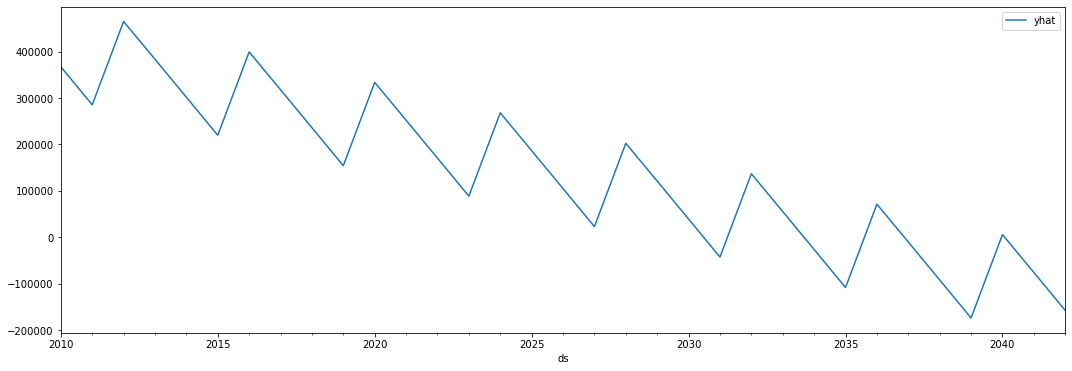

In [42]:
forecast_y.plot(x='ds',y='yhat',figsize=(18,6))

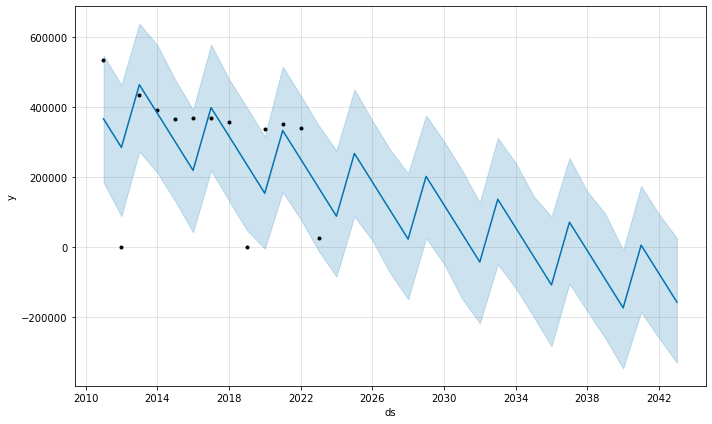

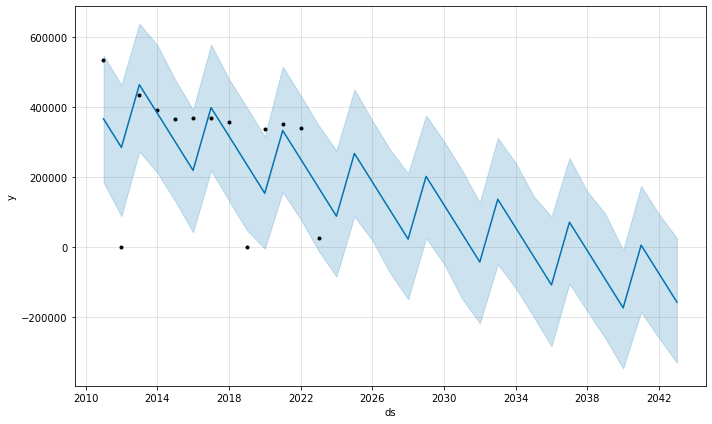

In [43]:
model_y.plot(forecast_y, uncertainty=True)

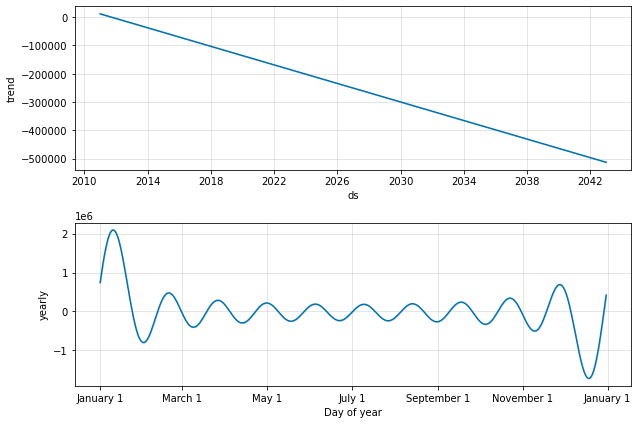

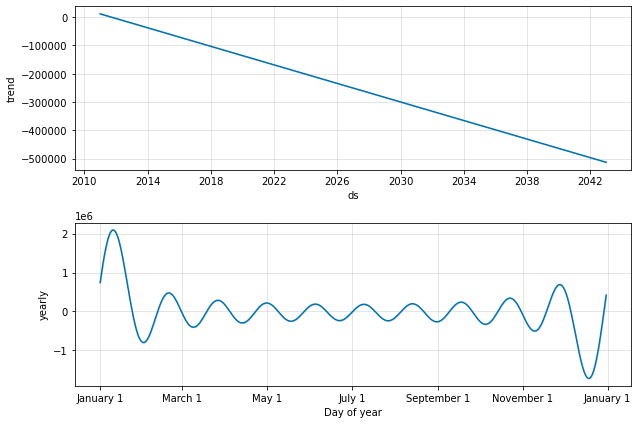

In [44]:
model_y.plot_components(forecast_y)

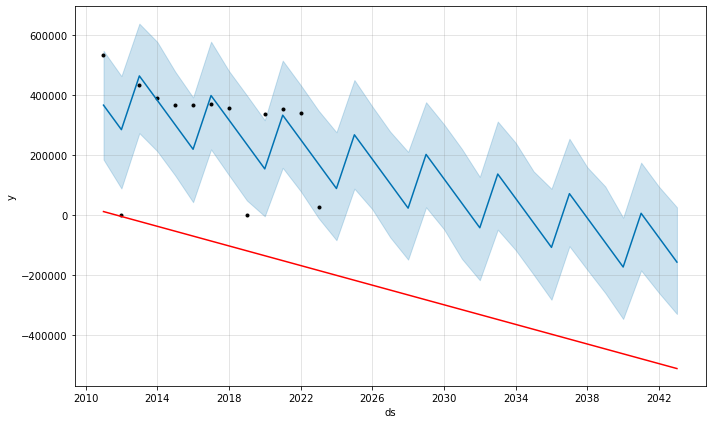

In [45]:
fig = model_y.plot(forecast_y)
a_y = add_changepoints_to_plot(fig.gca(), model_y, forecast_y)

In [46]:
#Importing daily Data

In [47]:
daily = pd.read_csv('daily1.csv', header = 0)

In [48]:
daily

,ds,y
0,2010-01-01,1466.0
1,2010-01-02,1466.0
2,2010-01-03,1466.0
3,2010-01-04,1466.0
4,2010-01-05,1466.0
...,...,...
4409,2022-01-27,909.0
4410,2022-01-28,909.0
4411,2022-01-29,909.0
4412,2022-01-30,909.0


In [49]:
daily.columns = ['ds','y']

In [50]:
daily

,ds,y
0,2010-01-01,1466.0
1,2010-01-02,1466.0
2,2010-01-03,1466.0
3,2010-01-04,1466.0
4,2010-01-05,1466.0
...,...,...
4409,2022-01-27,909.0
4410,2022-01-28,909.0
4411,2022-01-29,909.0
4412,2022-01-30,909.0


In [51]:
df_d = daily

In [52]:
df_d

,ds,y
0,2010-01-01,1466.0
1,2010-01-02,1466.0
2,2010-01-03,1466.0
3,2010-01-04,1466.0
4,2010-01-05,1466.0
...,...,...
4409,2022-01-27,909.0
4410,2022-01-28,909.0
4411,2022-01-29,909.0
4412,2022-01-30,909.0


In [53]:
#Forecasting the model to get values for next 365 days

In [54]:
model_d = Prophet()

model_d.fit(df_d)

05:31:25 - cmdstanpy - INFO - Chain [1] start processing
05:31:26 - cmdstanpy - INFO - Chain [1] done processing


In [55]:
future = model_d.make_future_dataframe(periods = 365 , freq = 'D')

In [56]:
forecast_d = model_d.predict(future)

In [57]:
forecast_d

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-01-01,1463.583462,1314.236324,1506.115837,1463.583462,1463.583462,-56.515769,-56.515769,-56.515769,-1.430982,-1.430982,-1.430982,-55.084787,-55.084787,-55.084787,0.0,0.0,0.0,1407.067693
1,2010-01-02,1463.683872,1316.842209,1514.092776,1463.683872,1463.683872,-49.419406,-49.419406,-49.419406,0.109371,0.109371,0.109371,-49.528778,-49.528778,-49.528778,0.0,0.0,0.0,1414.264466
2,2010-01-03,1463.784282,1319.710202,1524.975416,1463.784282,1463.784282,-43.088568,-43.088568,-43.088568,0.728451,0.728451,0.728451,-43.817019,-43.817019,-43.817019,0.0,0.0,0.0,1420.695714
3,2010-01-04,1463.884691,1327.381359,1525.817785,1463.884691,1463.884691,-36.295741,-36.295741,-36.295741,1.794330,1.794330,1.794330,-38.090071,-38.090071,-38.090071,0.0,0.0,0.0,1427.588950
4,2010-01-05,1463.985101,1328.032831,1531.260024,1463.985101,1463.985101,-31.841692,-31.841692,-31.841692,0.648430,0.648430,0.648430,-32.490122,-32.490122,-32.490122,0.0,0.0,0.0,1432.143410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4774,2023-01-27,957.678094,801.304684,1013.164255,930.931700,986.004120,-54.520032,-54.520032,-54.520032,-1.430982,-1.430982,-1.430982,-53.089050,-53.089050,-53.089050,0.0,0.0,0.0,903.158062
4775,2023-01-28,957.681754,793.666843,1003.412567,930.696711,986.238470,-56.101529,-56.101529,-56.101529,0.109371,0.109371,0.109371,-56.210901,-56.210901,-56.210901,0.0,0.0,0.0,901.580225
4776,2023-01-29,957.685414,794.654076,993.282020,930.556440,986.441383,-58.026091,-58.026091,-58.026091,0.728451,0.728451,0.728451,-58.754543,-58.754543,-58.754543,0.0,0.0,0.0,899.659323
4777,2023-01-30,957.689075,798.475361,1009.628514,930.394453,986.621270,-58.879564,-58.879564,-58.879564,1.794330,1.794330,1.794330,-60.673894,-60.673894,-60.673894,0.0,0.0,0.0,898.809511


<AxesSubplot:xlabel='ds'>

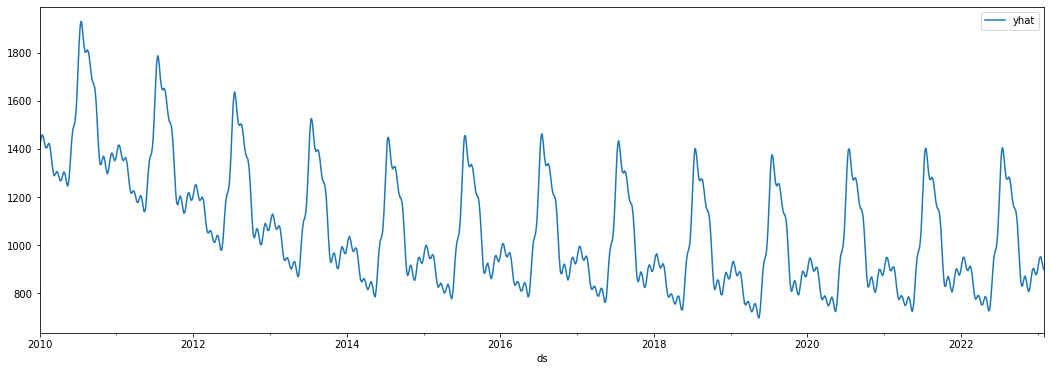

In [58]:
forecast_d.plot(x='ds',y='yhat',figsize=(18,6))

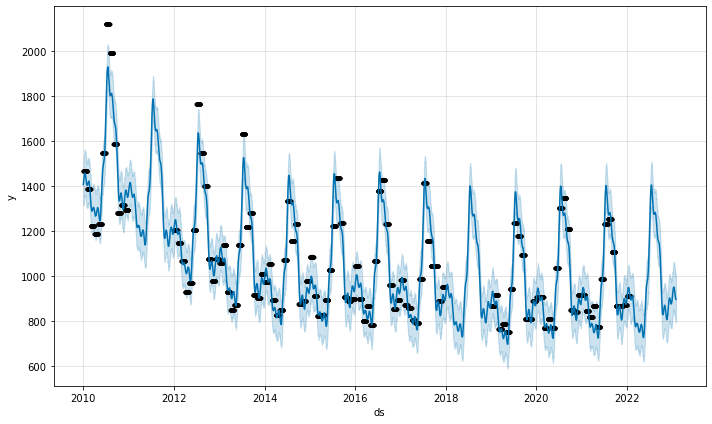

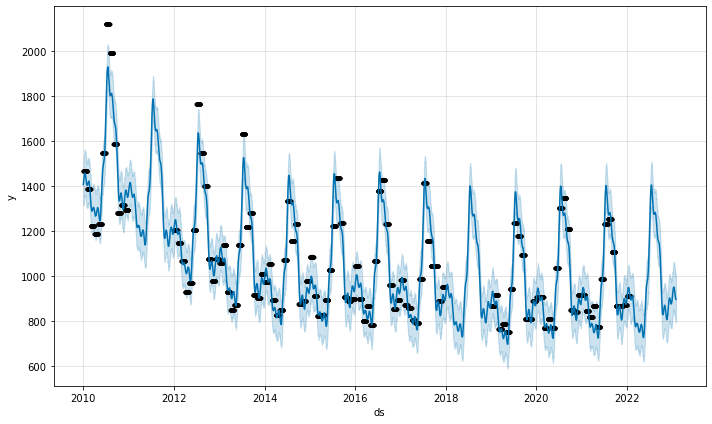

In [59]:
model_d.plot(forecast_d, uncertainty=True)

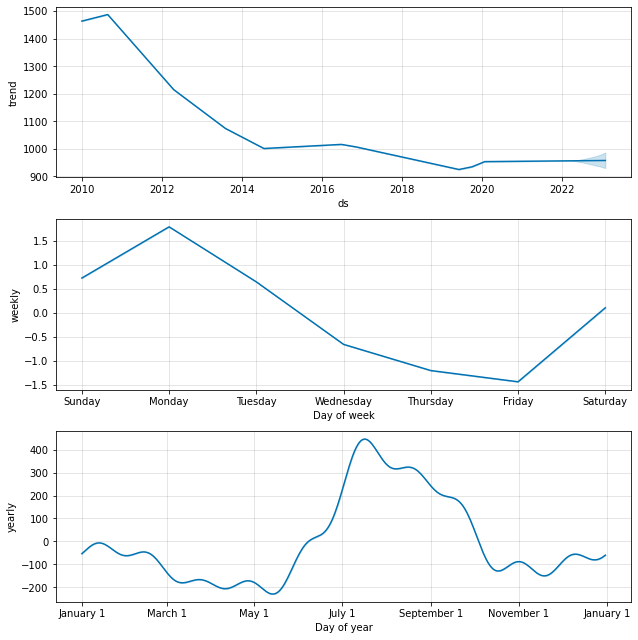

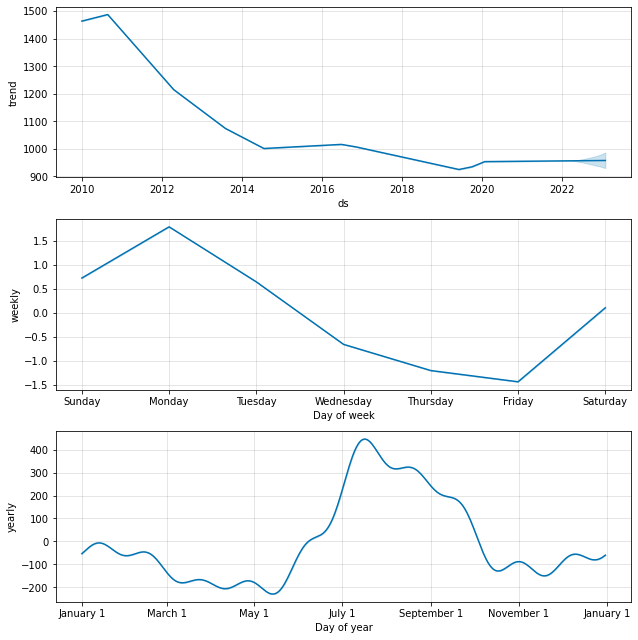

In [60]:
model_d.plot_components(forecast_d)

In [61]:
#Changepoints for the model 

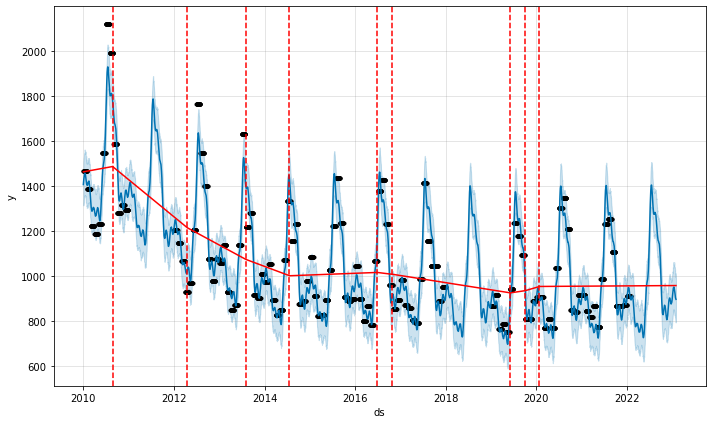

In [62]:
fig = model_d.plot(forecast_d)
a_d = add_changepoints_to_plot(fig.gca(), model_d, forecast_d)

  0%|          | 0/1 [00:00<?, ?it/s]

05:31:27 - cmdstanpy - INFO - Chain [1] start processing
05:31:27 - cmdstanpy - INFO - Chain [1] done processing


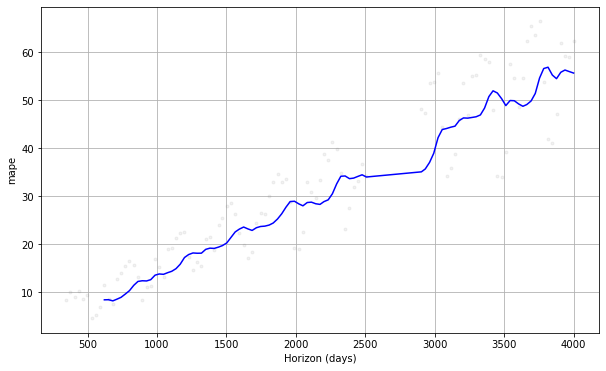

In [63]:
df_cv_1 = cross_validation(model_d, initial='370 days', period='50 days', horizon = '4000 days')
df_p = performance_metrics(df_cv)
df_p

fig1 = plot_cross_validation_metric(df_cv, metric='mape')


In [64]:
performance_metrics(df_cv_1, rolling_window=1)

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,4000 days,114064.686215,337.734639,260.778868,0.278007,0.187587,0.374144,0.251883


In [65]:
#Using hyperparameters for model training 

In [66]:
model_d_m = Prophet(changepoint_range= 0.8 , seasonality_mode = 'additive')

model_d_m.fit(df_d)

05:31:28 - cmdstanpy - INFO - Chain [1] start processing
05:31:29 - cmdstanpy - INFO - Chain [1] done processing


In [67]:
future = model_d_m.make_future_dataframe(periods = 365 , freq = 'D')
forecast_d_m = model_d_m.predict(future)

In [68]:
forecast_d_m.tail(100)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
4679,2022-10-24,957.330371,748.520048,951.034729,941.130822,971.645242,-110.206774,-110.206774,-110.206774,1.794330,1.794330,1.794330,-112.001104,-112.001104,-112.001104,0.0,0.0,0.0,847.123597
4680,2022-10-25,957.334031,748.062225,956.671706,941.041076,971.731259,-106.933771,-106.933771,-106.933771,0.648430,0.648430,0.648430,-107.582201,-107.582201,-107.582201,0.0,0.0,0.0,850.400261
4681,2022-10-26,957.337692,761.566377,959.362994,940.951329,971.817275,-103.919134,-103.919134,-103.919134,-0.652293,-0.652293,-0.652293,-103.266841,-103.266841,-103.266841,0.0,0.0,0.0,853.418558
4682,2022-10-27,957.341352,744.484153,963.020883,940.828707,971.990587,-100.437886,-100.437886,-100.437886,-1.197308,-1.197308,-1.197308,-99.240578,-99.240578,-99.240578,0.0,0.0,0.0,856.903466
4683,2022-10-28,957.345012,761.279827,966.053541,940.694288,972.078766,-97.103204,-97.103204,-97.103204,-1.430982,-1.430982,-1.430982,-95.672222,-95.672222,-95.672222,0.0,0.0,0.0,860.241808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4774,2023-01-27,957.678094,802.979427,1014.761452,930.526239,982.549536,-54.520032,-54.520032,-54.520032,-1.430982,-1.430982,-1.430982,-53.089050,-53.089050,-53.089050,0.0,0.0,0.0,903.158062
4775,2023-01-28,957.681754,786.367005,1011.457487,930.353972,982.669903,-56.101529,-56.101529,-56.101529,0.109371,0.109371,0.109371,-56.210901,-56.210901,-56.210901,0.0,0.0,0.0,901.580225
4776,2023-01-29,957.685414,795.797217,992.978020,930.185309,982.790270,-58.026091,-58.026091,-58.026091,0.728451,0.728451,0.728451,-58.754543,-58.754543,-58.754543,0.0,0.0,0.0,899.659323
4777,2023-01-30,957.689075,793.032241,1007.953279,930.019871,982.886465,-58.879564,-58.879564,-58.879564,1.794330,1.794330,1.794330,-60.673894,-60.673894,-60.673894,0.0,0.0,0.0,898.809511


05:31:30 - cmdstanpy - INFO - Chain [1] start processing
05:31:30 - cmdstanpy - INFO - Chain [1] done processing


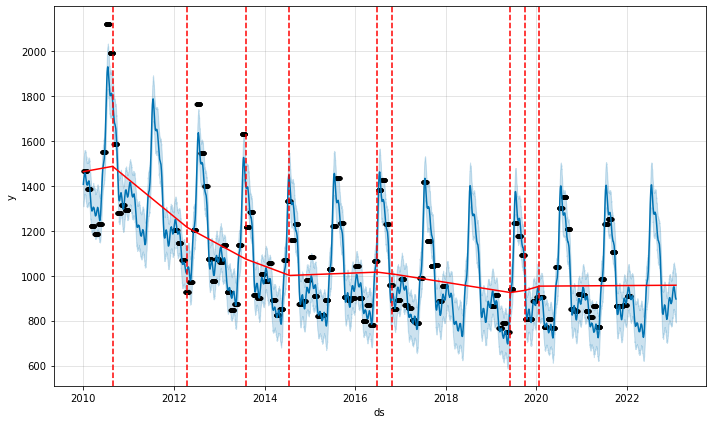

In [69]:
model_change = Prophet(changepoint_range=0.8)
fst = model_change.fit(df_d).predict(future)
fig = model_change.plot(fst);
a = add_changepoints_to_plot(fig.gca(), model_change, fst)

In [70]:
baseline_model_cv = cross_validation(model=model_d, initial='400 days', period='30 days', horizon = '4000 days', parallel="processes")
baseline_model_cv

05:31:33 - cmdstanpy - INFO - Chain [1] start processing
05:31:33 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2012-01-01,1215.908561,1143.831478,1294.156037,1203.0,2011-02-18
1,2012-01-02,1221.093707,1143.552161,1300.734155,1203.0,2011-02-18
2,2012-01-03,1236.670374,1167.127707,1316.720876,1203.0,2011-02-18
3,2012-01-04,1238.008751,1159.352293,1311.504369,1203.0,2011-02-18
4,2012-01-05,1257.762470,1183.724143,1341.183309,1203.0,2011-02-18
...,...,...,...,...,...,...
3314,2022-01-27,217.420973,142.487209,291.698669,909.0,2011-02-18
3315,2022-01-28,206.962681,129.603836,286.127116,909.0,2011-02-18
3316,2022-01-29,203.562210,127.407193,278.791080,909.0,2011-02-18
3317,2022-01-30,197.360007,118.358322,272.580144,909.0,2011-02-18


In [71]:
baseline_model_p = performance_metrics(baseline_model_cv, rolling_window=1)
baseline_model_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,4000 days,114064.686215,337.734639,260.778868,0.278007,0.187587,0.374144,0.251281


In [72]:
results = pd.read_csv('results.csv')

In [73]:
results

,Type,Duration,Value,Timeframe
0,Monthly,1,24591.6400,2022-02
1,Monthly,6,39700.3500,2022-07
2,Monthly,9,25578.4700,2022-10
3,Yearly,1,88629.3900,2023
4,Yearly,10,136922.0051,2032
5,Yearly,20,-157283.9200,2042
6,Daily,100,730.9300,2022-05-11\t
7,Daily,200,1277.4400,8/19/2022
8,Daily,365,896.4000,1/31/2023
